In [43]:
import numpy as np
import pandas as pd

data = pd.read_csv("C:/Users/laayt/Downloads/movie_metadata.csv")

In [44]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>[InternetShortcut]
URL=http://localhost:8888/notebooks/Movie_rating.ipynb#


In [45]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Dividing Genre column into multiple columns

In [46]:
# adding new columns to the old dataframe
data[['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8']] = data['genres'].str.split('|',expand=True)

In [47]:
data = pd.melt(data, id_vars=data[data.columns[:-8]], 
                 var_name='genres_', value_name="Type")

#### Inspecting the Missing Value Report

In [48]:
def getMissingvalues(dataset,rownums=5):
    dataset1 = pd.DataFrame(dataset.isnull().sum(), columns = ["Number of missing data points"])
    dataset1['Percentage Missing values (%)'] = round((dataset1['Number of missing data points']/len(dataset))*100, 2)
    dataset1 = dataset1.sort_values(by=['Percentage Missing values (%)'], kind = 'quicksort', ascending=False)
    if dataset1.iloc[0, 0] > 0:
        return dataset1.head(rownums)
    else:
        return print("No Missing values in this dataset")
    
getMissingvalues(data, 5)

,Number of missing data points,Percentage Missing values (%)
Type,25840,64.05
gross,7072,17.53
budget,3936,9.76
aspect_ratio,2632,6.52
content_rating,2424,6.01


#### Observing the Numerical and Categorical Variables of the Dataset

In [49]:
def numerical_variables(dataset):
    a = pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8']).dtypes, columns = ["Data Type"])
    a['Number of levels'] = pd.DataFrame(dataset.select_dtypes(include=['float64','float32','int32','int64', 'uint8'])).nunique()
    return a

print("dimensions:", numerical_variables(data).shape)
numerical_variables(data)

dimensions: (16, 2)


,Data Type,Number of levels
num_critic_for_reviews,float64,528
duration,float64,191
director_facebook_likes,float64,435
actor_3_facebook_likes,float64,906
actor_1_facebook_likes,float64,878
gross,float64,4035
num_voted_users,int64,4826
cast_total_facebook_likes,int64,3978
facenumber_in_poster,float64,19
num_user_for_reviews,float64,954


In [50]:
def categorical_variables(dataset):
    a = pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_']).dtypes, columns = ["Data Type"])
    a['Number of levels'] = pd.DataFrame(dataset.select_dtypes(include=['category', 'object', 'bool_'])).nunique()
    return a
categorical_variables(data)

,Data Type,Number of levels
color,object,2
director_name,object,2398
actor_2_name,object,3032
genres,object,914
actor_1_name,object,2097
movie_title,object,4917
actor_3_name,object,3521
plot_keywords,object,4760
movie_imdb_link,object,4919
language,object,47


In [51]:
data.shape

(40344, 30)

#### Handling Missing values
(removing rows, cols and imputing missing values with mean)

In [52]:
data = data.dropna(subset=['Type'])

In [53]:
data = data.drop(['genres', "genres_", "movie_imdb_link", "plot_keywords"], axis=1)

In [54]:
getMissingvalues(data)

,Number of missing data points,Percentage Missing values (%)
gross,2305,15.89
budget,1258,8.67
aspect_ratio,730,5.03
content_rating,710,4.90
title_year,317,2.19


In [55]:
data[['gross', 'budget', 'aspect_ratio', 'title_year']] = data[['gross', 'budget', 'aspect_ratio', 'title_year']].fillna( data[['gross', 'budget', 'content_rating', 'title_year']].mean() )

In [56]:
data = data.dropna(axis=0)

In [57]:
getMissingvalues(data)

No Missing values in this dataset


In [58]:
def create_dummy_variables(dataset, list_of_varnames):
    dataset1 = pd.get_dummies(dataset[list_of_varnames])
    dataset = pd.concat([dataset, dataset1], axis =1)
    dataset.drop(list_of_varnames, axis = 1, inplace = True)
    return dataset

In [59]:
print(data.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Type'],
      dtype='object')


In [60]:
data.shape

(13067, 26)

### <span style="color:#000058">The Highest Rated Directors on IMDB </span>

In [61]:
data.groupby('director_name').imdb_score.agg(['mean', 'count']).sort_values('mean', ascending = False).head(10)

,mean,count
director_name,,
Sadyk Sher-Niyaz,8.700000,4
Akira Kurosawa,8.700000,3
Charles Chaplin,8.600000,3
Tony Kaye,8.600000,2
Ron Fricke,8.500000,2
Damien Chazelle,8.500000,2
Majid Majidi,8.500000,2
Christopher Nolan,8.466667,24
Catherine Owens,8.400000,2


### THE Highest Rated Lead Actors on IMDB

In [62]:
data.groupby('actor_1_name').imdb_score.agg(['mean', 'count']).sort_values('mean', ascending = False).head(10)

,mean,count
actor_1_name,,
Jack Warden,8.9,2
Elina Abai Kyzy,8.7,4
Takashi Shimura,8.7,3
Paulette Goddard,8.6,3
Claudia Cardinale,8.6,1
Bunta Sugawara,8.6,4
Donna Reed,8.6,4
Humphrey Bogart,8.6,3
Bahare Seddiqi,8.5,2


### <span style="color:#000058">The Distribution of IMDB ratings from 1960s to Present</span>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 8)
sns.set_style("ticks")
sns.set_context("talk")
g =sns.boxplot(x="title_year", y="imdb_score", color="lightgreen", data=data[data.title_year > 1960])
plt.xticks(rotation=90)
plt.show()

*We can see that after 1996,there are more low-rated movies (outliers) than earlier*

### <span style="color:#000058">Movie Rating Distribution for each Country </span>

In [23]:
country = data.groupby('country').imdb_score.agg(['mean', 'count']).sort_values('count', ascending = False).head(25)
newc = data[data['country'].isin(list(country.index))]

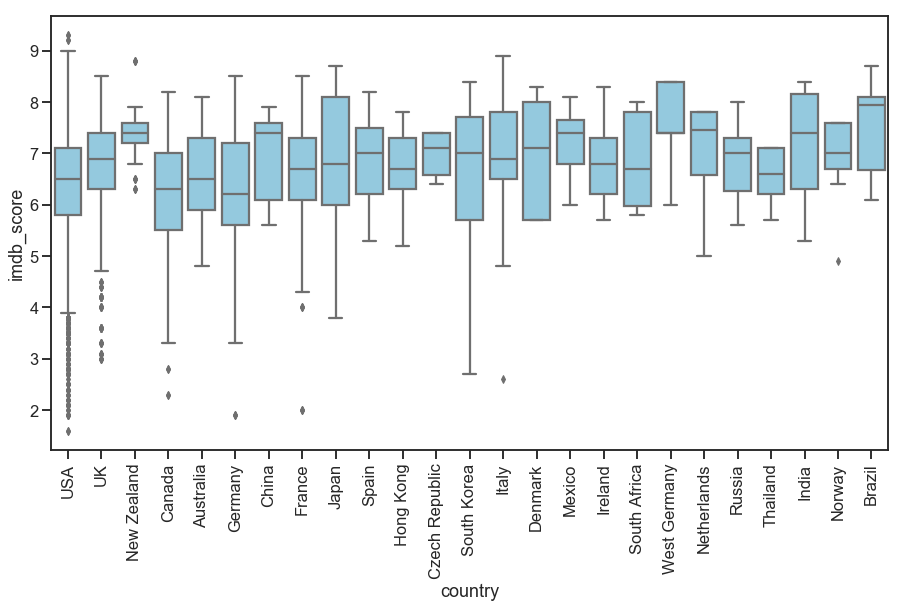

In [24]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.set_style("ticks")
sns.set_context("talk")
g =sns.boxplot(x="country", y="imdb_score", color="skyblue", data=newc)
plt.xticks(rotation=90)
plt.show()

*West Germany and Brazil have the higher movie rating as compared to other countries. For US the distribution of movie ratings is much more spreaded out with many outlier low-rated movies. *

### <span style="color:#000058">The Distribution of Movie Ratings-Genres </span>

In [25]:
genre = data.groupby('Type').imdb_score.agg(['mean', 'count']).sort_values('count', ascending = False).head(10)

In [26]:
newg = data[data['Type'].isin(list(genre.index))]

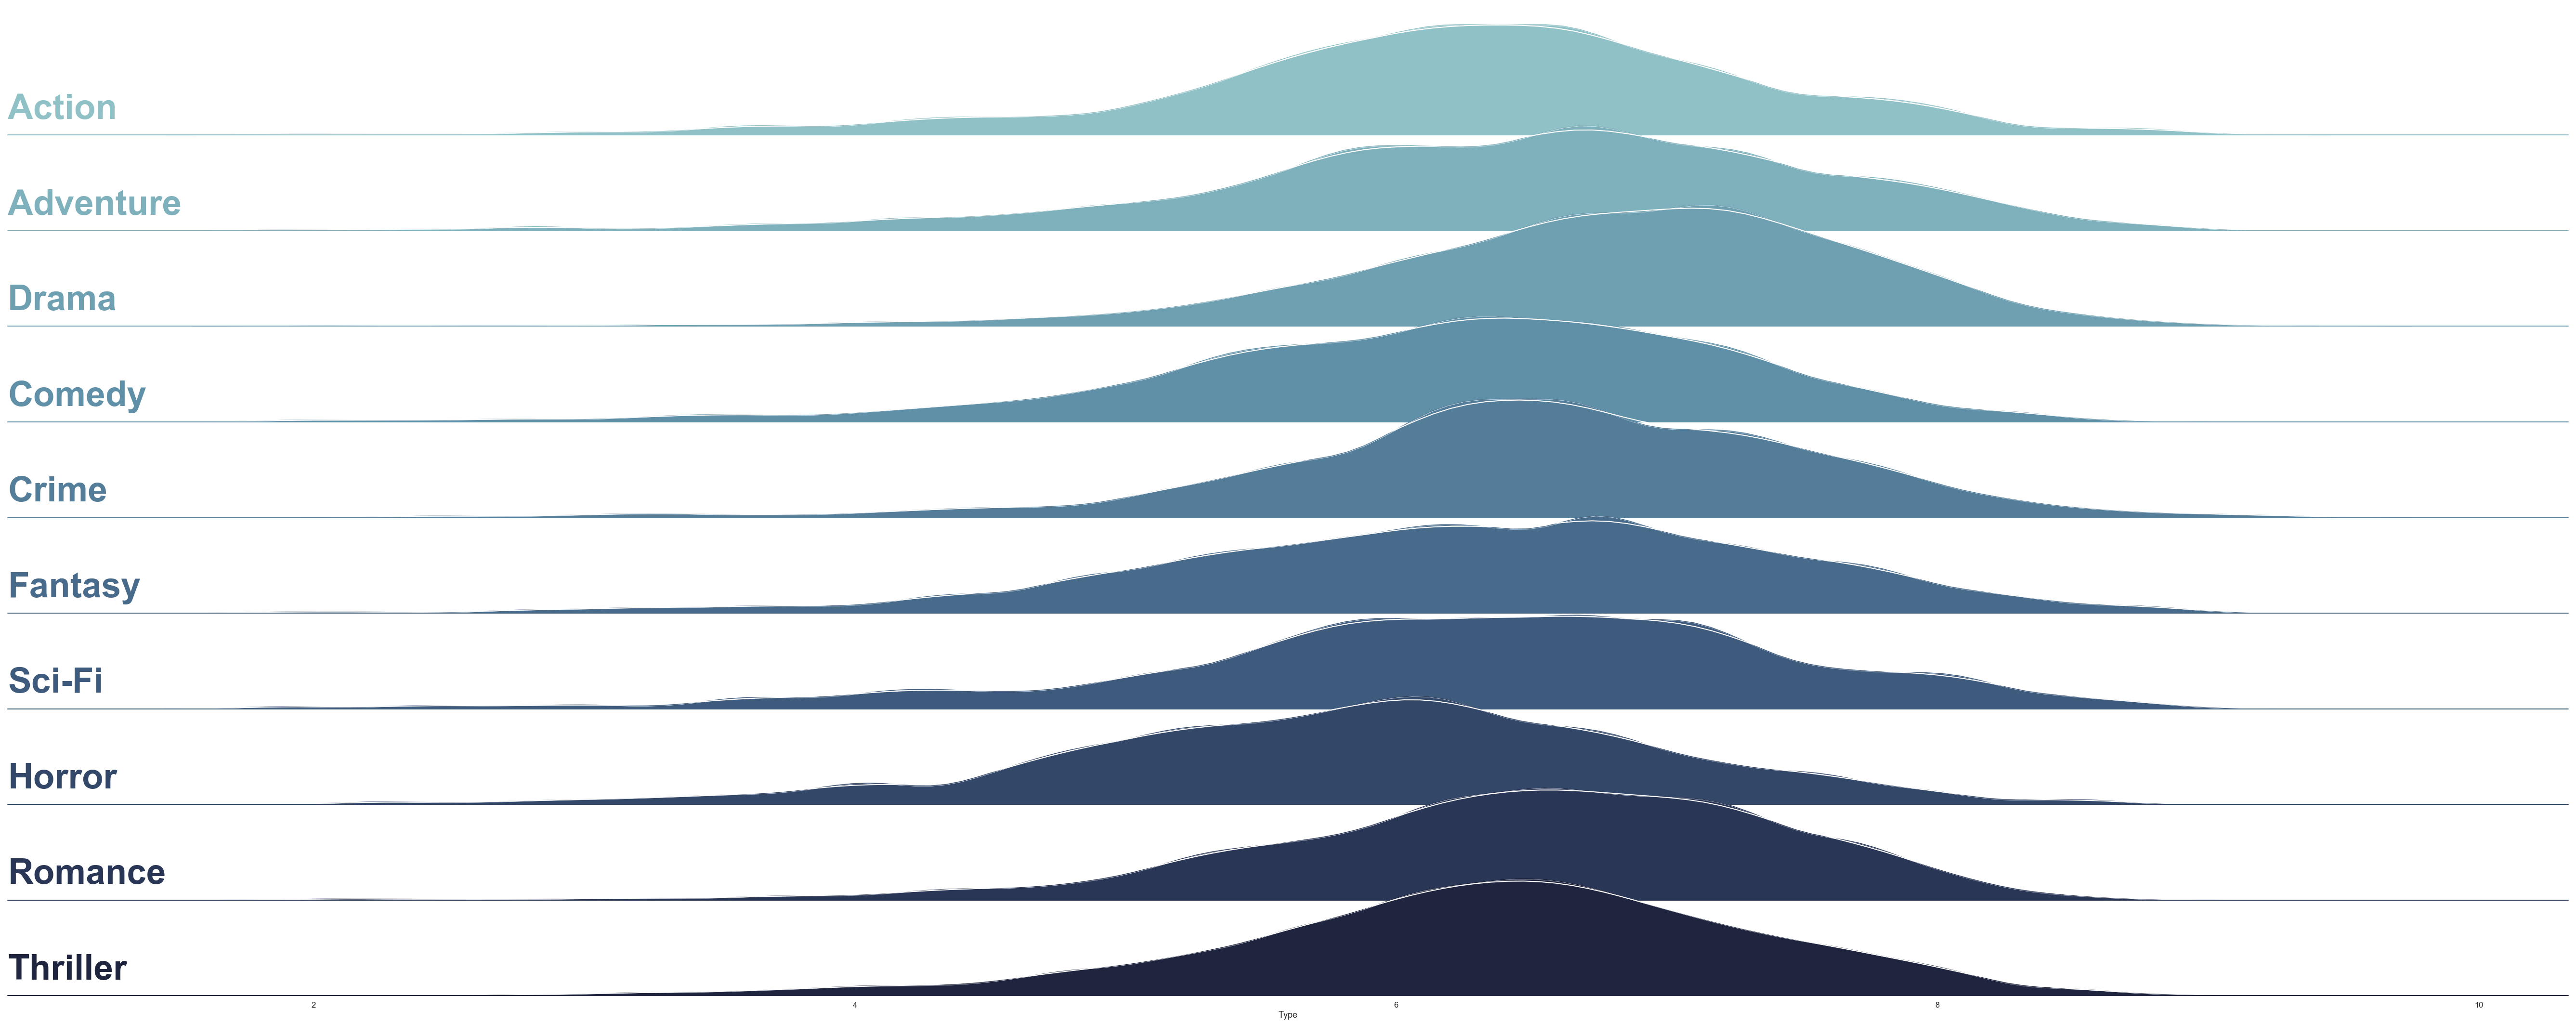

In [27]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context("talk")
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(newg, row="Type", hue="Type", aspect=25, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "imdb_score", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.15)
g.map(sns.kdeplot, "imdb_score", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,fontsize=73,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Type")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

<h4> As we can see that The Genres "Drama" and "advanture" are more rated than the "Horror" and "Comedy". </h4>

## <span style="color:#000058"> Observing Linear Relationship: IMDB-rating vs Num of Reviews </span>

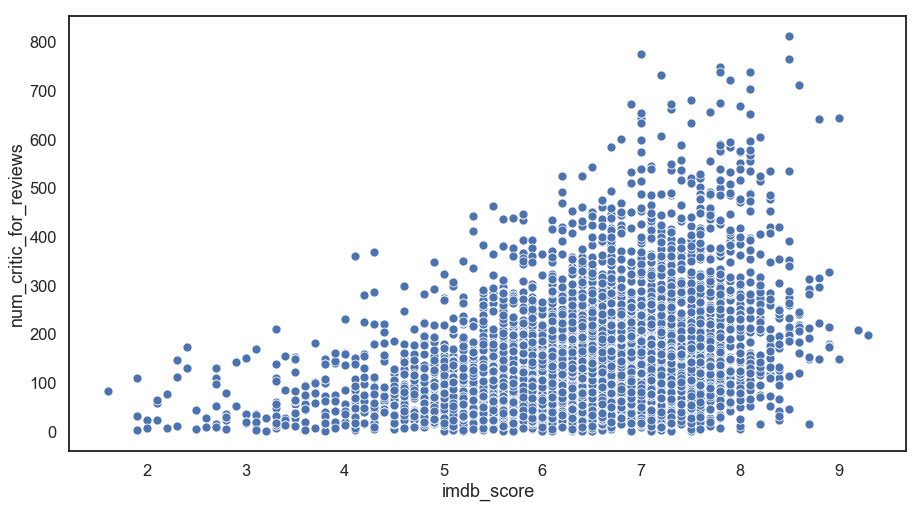

In [28]:
sns.scatterplot(x="imdb_score", y="num_critic_for_reviews",
                     palette="Set2",
                     data=data)

As we can see for the lower ratings, the number of reviewers are also less. Hard to make any conclustion about the realtionship between higher ratings and number of reviewers due to the hetroschadstistic nature of the distribution. 

## <span style="color:#000058"> Observing Linear Relationship: Budget vs Boxoffice Collection </span>

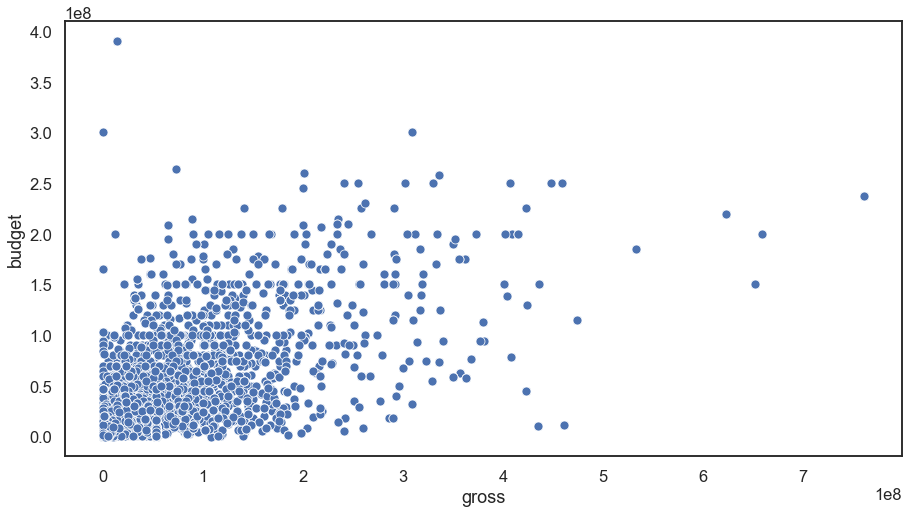

In [29]:
sns.scatterplot(x="gross", y="budget",
                     palette="Set2",hue_norm=(0, 7),
                     data=data[data.budget < 400000000])

After removing outliers(some outstandingly earned movies), found the linear relationship between Budget and the box-office collection. So, more the bduget, the collection is also higher. 

#### Creating Dummy Variables

In [63]:
data.shape

(13067, 26)

In [64]:
convert_to_dummy = ['color', 'director_name', 'actor_1_name', 'language', 'country', 'actor_2_name', 'actor_3_name', 'Type', 'content_rating']

In [65]:
data = data.drop(["movie_title"], axis=1)

In [66]:
data = create_dummy_variables(data, convert_to_dummy)

In [67]:
data.shape

(13067, 9595)

After creating dummy variables the total number of features is increased to 9595 from 26. 

#### Splitting Training and Testing dataset

In [68]:
y = data['imdb_score']
X = data.drop('imdb_score',axis =1)

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#deviding train test split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### <span style="color:#000058"> Linear Regression Model </span>

<h4>First we will try to build "Linear Regression" model since we are predicting the continious values, the loss function would be "RMSE"

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
X_pred = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error
linreg_test = mean_squared_error(y_test, y_pred)

In [40]:
linreg_train =mean_squared_error(y_train, X_pred)

In [41]:
print("Root Mean Square Error: Training :", linreg_train)
print("Root Mean Square Error: Testing :", linreg_test)

Root Mean Square Error: Training : 0.00014753902922413973
Root Mean Square Error: Testing : 1.4660606308321133e+21


<h5> As we can see, for "Train-model" the RMSE is extremely low but, the "Test-model" the RMSE is above 1. The test model is not as good as training model. The clear case of overfitting. To overcome we will train the "Lasso" model to see if we are able to decrease the gap between "Train-Model" and "Test-Model". </h5>

### <span style="color:#000058"> LASSO </span>

In [42]:
from sklearn.linear_model import Lasso

# rebuild a model on the combined training and validation set
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
X_pred_lasso = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

In [44]:
lasso_test = mean_squared_error(y_test, y_pred_lasso)

In [45]:
lasso_train = mean_squared_error(y_train, X_pred_lasso)

In [46]:
print("Root Mean Square Error: Training :", lasso_train)
print("Root Mean Square Error: Testing :", lasso_test)

Root Mean Square Error: Training : 0.698773074220349
Root Mean Square Error: Testing : 0.6765083217437696


<h5> As we can see, there is only small difference between the "Train-model" and the "Test-model" for Lasso model. We were able to decrease the error gap by half. But, we can still improve the model-performance. We will train the "Ridge" model to see if we find any improvements. </h5>

### <span style="color:#000058"> RIDGE </span>

In [47]:
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
X_pred_ridge = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)

In [49]:
ridge_test = mean_squared_error(y_test, y_pred_ridge)

In [50]:
ridge_train = mean_squared_error(y_train, X_pred_ridge)

In [51]:
print("Root Mean Square Error: Training :", ridge_train)
print("Root Mean Square Error: Testing :", ridge_test)

Root Mean Square Error: Training : 0.0008601094977929709
Root Mean Square Error: Testing : 0.09563921023880709


### Neural Network -Keras

In [68]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

C:\Users\laayt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [73]:
model = Sequential()
model.add(Dense(13, input_dim=9594, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [74]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [78]:
model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
9146/9146 [==============================] - 3s 315us/step - loss: 0.8346 - mean_squared_error: 0.8346
Epoch 2/250
9146/9146 [==============================] - 3s 356us/step - loss: 0.6813 - mean_squared_error: 0.6813
Epoch 3/250
9146/9146 [==============================] - 3s 356us/step - loss: 0.5998 - mean_squared_error: 0.5998
Epoch 4/250
9146/9146 [==============================] - 3s 332us/step - loss: 0.5425 - mean_squared_error: 0.5425
Epoch 5/250
9146/9146 [==============================] - 3s 335us/step - loss: 0.4966 - mean_squared_error: 0.4966
Epoch 6/250
9146/9146 [==============================] - 3s 350us/step - loss: 0.4540 - mean_squared_error: 0.4540
Epoch 7/250
9146/9146 [==============================] - 3s 344us/step - loss: 0.4138 - mean_squared_error: 0.4138
Epoch 8/250
9146/9146 [==============================] - 3s 347us/step - loss: 0.3789 - mean_squared_error: 0.3789
Epoch 9/250
9146/9146 [==============================] - 3s 369us/step - loss: 0

9146/9146 [==============================] - 3s 318us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 142/250
9146/9146 [==============================] - 3s 356us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 143/250
9146/9146 [==============================] - 3s 351us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 144/250
9146/9146 [==============================] - 4s 437us/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 145/250
9146/9146 [==============================] - 3s 352us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 146/250
9146/9146 [==============================] - 4s 384us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 147/250
9146/9146 [==============================] - 4s 394us/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 148/250
9146/9146 [==============================] - 4s 395us/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 149/250
9146/9146 [==============================] - 4s 402us/step - los

In [111]:
model.evaluate(X_train, y_train)

9146/9146 [==============================] - 2s 207us/step


[0.0036151290145370087, 0.0036151290145370087]

In [112]:
model.evaluate(X_test, y_test)

3921/3921 [==============================] - 1s 262us/step


[0.11071188916618256, 0.11071188916618256]

### Gradient Boosting Regressor

In [70]:
from  sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(random_state=0, learning_rate = 0.01)
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [71]:
X_pred_gboost = GBoost.predict(X_train)

In [72]:
y_pred_gboost = GBoost.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error
GBoost_train = mean_squared_error(y_train, X_pred_gboost)

In [75]:
GBoost_test = mean_squared_error(y_test, y_pred_gboost)

In [76]:
print("Root Mean Square Error: Training :", GBoost_train)
print("Root Mean Square Error: Testing :", GBoost_test)

Root Mean Square Error: Training : 0.7558356262001206
Root Mean Square Error: Testing : 0.7286912905210857


###### From this model we are not able to find good results like Ridge and Neural Network Perceptron, We will tune the hyperparameters to obtain better rmse value. 

In [121]:
from sklearn.model_selection import GridSearchCV
learning_rate = [0.01, 0.1]
max_depth = [5, 10, 15]
param_grid = {'learning_rate' : learning_rate, 'max_depth': max_depth}

GBoost = GradientBoostingRegressor(random_state=0)

GBoost = GridSearchCV(GBoost,param_grid)
GBoost.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Gradient Boosting Parameters: {}".format(GBoost.best_params_))
print("Best score is {}".format(GBoost.best_score_))

Tuned Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 15}
Best score is 0.8400225501954218


In [77]:
from  sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(random_state=0, max_depth = 15, learning_rate = 0.1)
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=15, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [145]:
X_pred_gboost = GBoost.predict(X_train)
y_pred_gboost = GBoost.predict(X_test)

GBoost_train = mean_squared_error(y_train, X_pred_gboost)
GBoost_test = mean_squared_error(y_test, y_pred_gboost)

print("Mean Square Error: Training :", GBoost_train)
print("Mean Square Error: Testing :", GBoost_test)

Mean Square Error: Training : 0.00042352614633689125
Mean Square Error: Testing : 0.08344623651028173


In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score?

In [141]:
GBoost = GradientBoostingRegressor(random_state=0, max_depth = 15, learning_rate = 0.1)
scores = cross_val_score(GBoost, X, y, cv=5, scoring='neg_mean_squared_error')

scores

array([-0.05157594, -0.15176902, -0.01158547, -0.00688044, -0.00301822])

In [142]:
scores.mean()

-0.044965817563581714

### <span style="color:#000058"> Comparision of Models </span>

### Production
The Gradient boosting with cross-validation got the average models score of 0.044 which is lower than that of Ridge model which was 0.086, So the **Gradient Boosting** model would be ideal to deploy into production. 

In [19]:
import pandas as pd
labels = ['Linear Regression:Lasso', 'Linear Regression:Ridge', 'Neural Network', 'GradientBoosting']
d3 = {'labels':labels, 'Testing Error': [0.6, 0.086, 0.11, 0.0449] }
results = pd.DataFrame(d3)
results

,labels,Testing Error
0,Linear Regression:Lasso,0.6000
1,Linear Regression:Ridge,0.0860
2,Neural Network,0.1100
3,GradientBoosting,0.0449


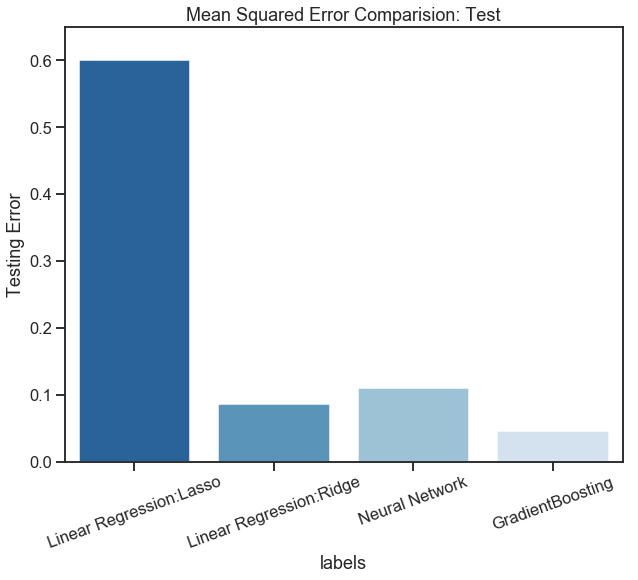

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
plt.subplots(figsize=(10,8))
g = sns.barplot(x="labels", y="Testing Error", palette= "Blues_r", data=results)
g.set_ylim(0, 0.65)
sns.set_context("talk")
plt.xticks(rotation=20)
plt.title('Mean Squared Error Comparision: Test')
plt.show()

So the mean squared error for the cross validated GradientBoosting regressor on the test model was the lowest 0.044 imdb rating. so model is able to predict imdb rating with on an average 0.044 difference mean squared error.